In [2]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
cars = pd.read_csv('data_clean.csv')
cars.drop(['Name'], axis = 1, inplace=True)
cars.head()


,Assemble,Type,Km,CarColor,InteriorColor,CarDoor,CarSeat,Gearbox,Price,Location,Status,EngineCar,Capacity,Trademark,ProductionYear
0,Lắp ráp trong nước,SUV,0,Trắng,Kem,5,5,Số tự động,2049,Hà Nội,mới,Xăng,2.0,Mercedes,2022
1,Nhập khẩu,SUV,0,Trắng,Màu khác,5,7,Số tự động,1989,Hà Nội,mới,Xăng,1.3,Mercedes,2022
2,Lắp ráp trong nước,SUV,0,Xanh,Đen,5,7,Số tự động,1083,Hà Nội,mới,Xăng,1.5,Honda,2022
3,Lắp ráp trong nước,Crossover,0,Đỏ,Đen,5,5,Số tự động,925,Hà Nội,mới,Xăng,2.0,Hyundai,2022
4,Lắp ráp trong nước,Sedan,0,Đen,Đen,4,5,Số tự động,2879,Hà Nội,cũ,Xăng,2.0,Mercedes,2021


In [49]:
cars.shape

(1950, 15)

In [5]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1974 entries, 0 to 1973
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              1974 non-null   int64  
 1   Name            1974 non-null   object 
 2   Assemble        1974 non-null   object 
 3   Type            1974 non-null   object 
 4   Km              1974 non-null   int64  
 5   CarColor        1974 non-null   object 
 6   InteriorColor   1974 non-null   object 
 7   CarDoor         1974 non-null   int64  
 8   CarSeat         1974 non-null   int64  
 9   Gearbox         1974 non-null   object 
 10  Price           1974 non-null   int64  
 11  Location        1974 non-null   object 
 12  Contact         1974 non-null   float64
 13  Year            1974 non-null   int64  
 14  Status          1974 non-null   object 
 15  EngineCar       1974 non-null   object 
 16  Capacity        1974 non-null   float64
 17  Trademark       1974 non-null   o

In [6]:
cars.Trademark.unique()

array(['Hyundai', 'Mazda', 'Toyota', 'Ford', 'Mercedes', 'BMW', 'Audi',
       'Honda', 'Kia', 'Mitsubishi', 'Suzuki', 'VinFast', 'Mini',
       'LandRover', 'Nissan', 'Volkswagen', 'Lexus', 'Peugeot',
       'Chevrolet', 'Maserati', 'Porsche', 'MG', 'Volvo', 'Hongqi',
       'Bentley', 'Ssangyong', 'Daewoo', 'Rolls', 'Isuzu', 'Subaru',
       'Acura', 'Jaguar', 'Jeep', 'Renault', 'Chrysler', 'RAM', 'TERACO',
       'Baic', 'Thaco', 'Lincoln', 'Luxgen', 'Aston'], dtype=object)

In [7]:
cars.columns

Index(['ID', 'Name', 'Assemble', 'Type', 'Km', 'CarColor', 'InteriorColor',
       'CarDoor', 'CarSeat', 'Gearbox', 'Price', 'Location', 'Contact', 'Year',
       'Status', 'EngineCar', 'Capacity', 'Trademark', 'ProductionYear'],
      dtype='object')

# Visualing data 

c:\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


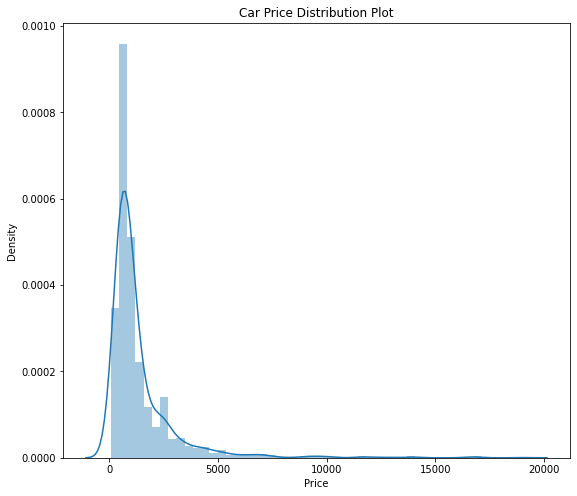

In [25]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.Price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.Price)

plt.show()

Các Categorical Data:
- Asssemble
- Type
- CarColor
- InteriorColor
- GearBox
- Location
- Status
- EngineCar
- Trademark

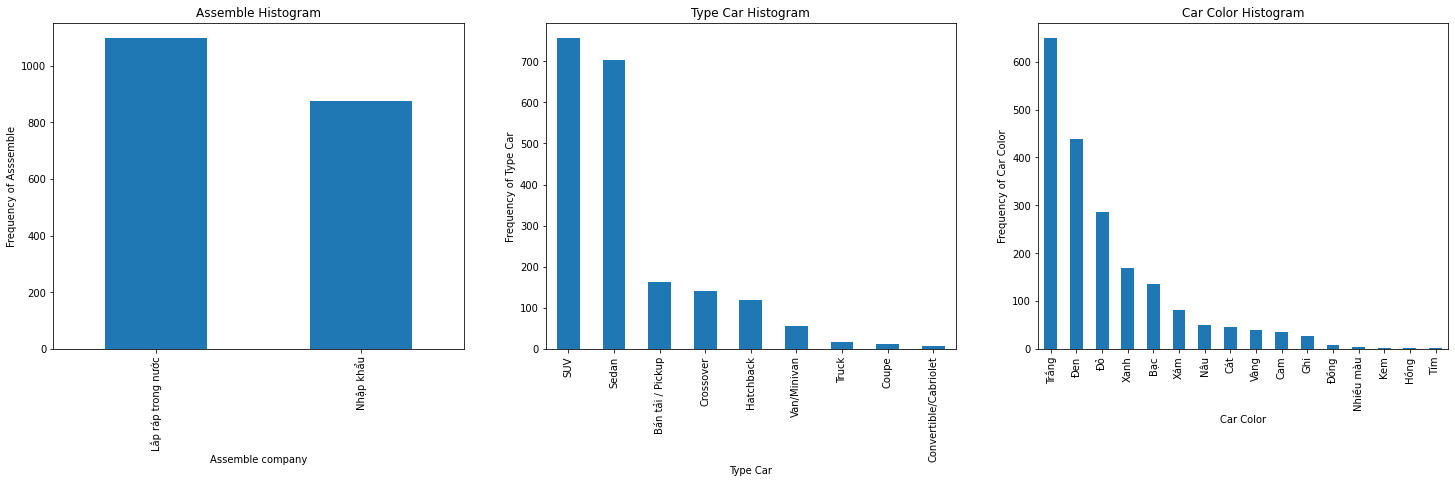

In [32]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.Assemble.value_counts().plot(kind = 'bar')
plt.title('Assemble Histogram')
plt1.set(xlabel = 'Assemble company', ylabel='Frequency of Asssemble')

plt.subplot(1,3,2)
plt1 = cars.Type.value_counts().plot( kind ='bar')
plt.title('Type Car Histogram')
plt1.set(xlabel = 'Type Car', ylabel='Frequency of Type Car')

plt.subplot(1,3,3)
plt1 = cars.CarColor.value_counts().plot(kind = 'bar')
plt.title('Car Color Histogram')
plt1.set(xlabel = 'Car Color', ylabel='Frequency of Car Color')

plt.show()

KL:
1. Xe lắp ráp trong nước được bán nhiều hơn.
2. SUV là hãng xe được ưa chuộng nhiều nhất.
3. Màu xe trắng là màu được đăng bán nhiều nhất.

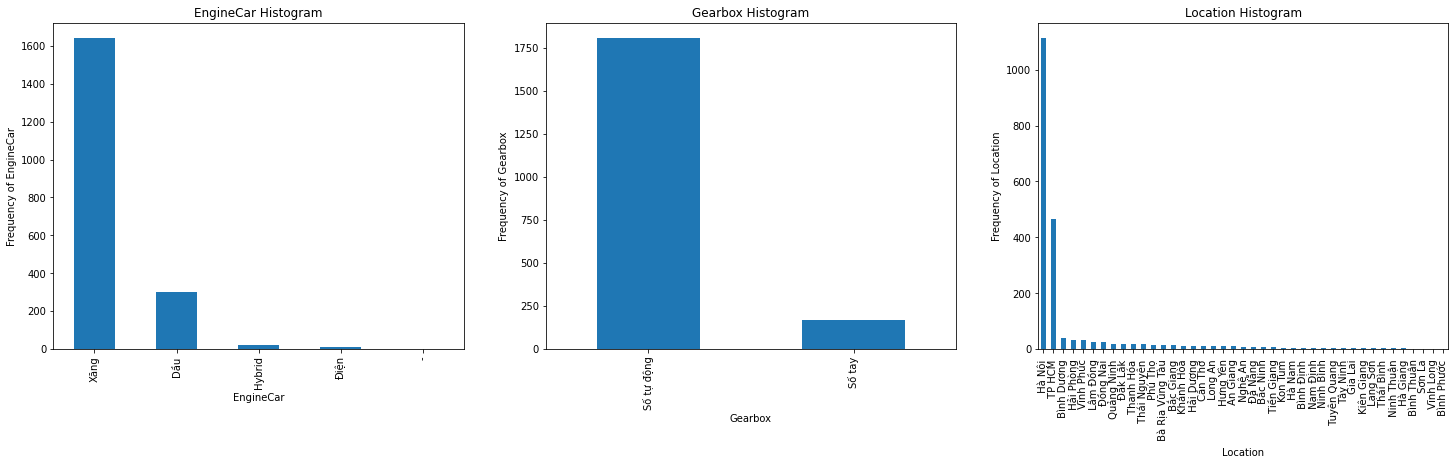

In [10]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.EngineCar.value_counts().plot(kind = 'bar')
plt.title('EngineCar Histogram')
plt1.set(xlabel = 'EngineCar', ylabel='Frequency of EngineCar')


plt.subplot(1,3,2)
plt1 = cars.Gearbox.value_counts().plot(kind = 'bar')
plt.title('Gearbox Histogram')
plt1.set(xlabel = 'Gearbox', ylabel='Frequency of Gearbox')

plt.subplot(1,3,3)
plt1 = cars.Location.value_counts().plot(kind = 'bar')
plt.title('Location Histogram')
plt1.set(xlabel = 'Location', ylabel='Frequency of Location')


plt.show()

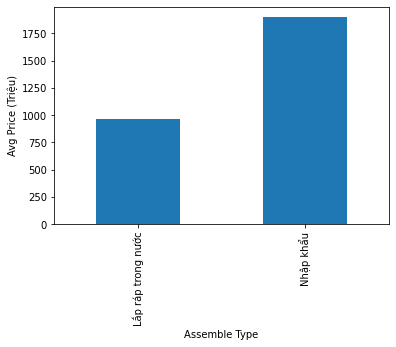

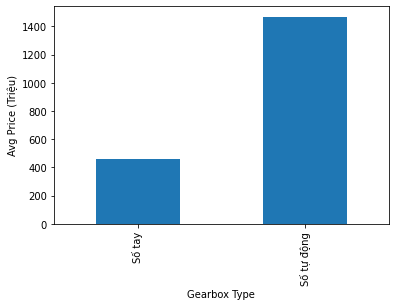

In [35]:


df_fuel_avg_price = cars[['Assemble','Price']].groupby("Assemble", as_index = False).mean().rename(columns={'Price':'assemble_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'Assemble', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Assemble Type")
plt1.set_ylabel("Avg Price (Triệu)")


df_fuel_avg_price = cars[['Gearbox','Price']].groupby("Gearbox", as_index = False).mean().rename(columns={'Price':'assemble_avg_price'})
plt1 = df_fuel_avg_price.plot(x = 'Gearbox', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Gearbox Type")
plt1.set_ylabel("Avg Price (Triệu)")

plt.show()

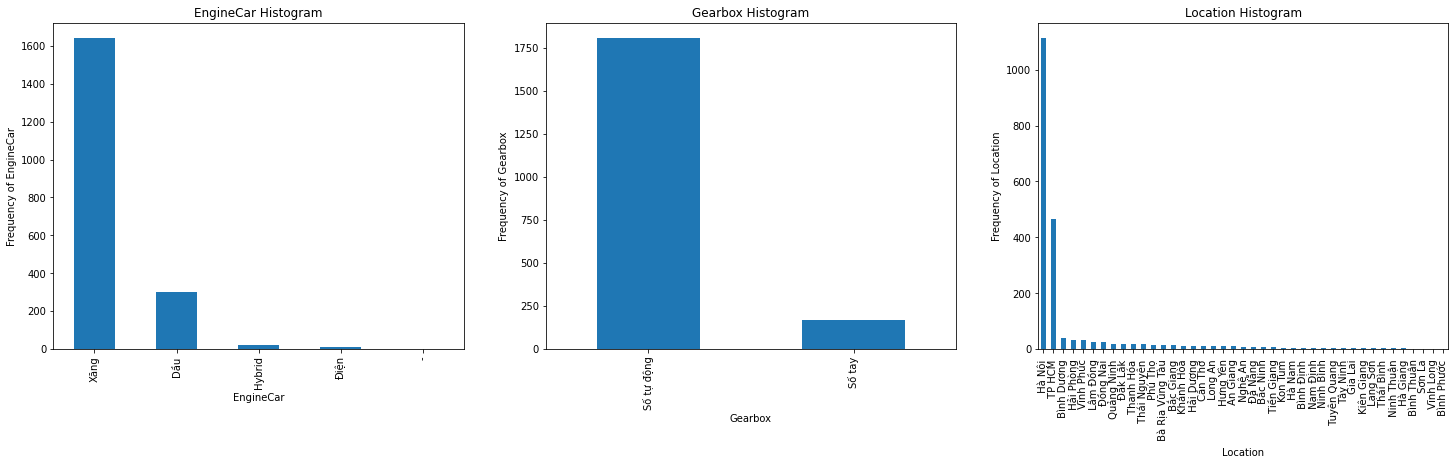

In [37]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.EngineCar.value_counts().plot(kind = 'bar')
plt.title('EngineCar Histogram')
plt1.set(xlabel = 'EngineCar', ylabel='Frequency of EngineCar')


plt.subplot(1,3,2)
plt1 = cars.Gearbox.value_counts().plot(kind = 'bar')
plt.title('Gearbox Histogram')
plt1.set(xlabel = 'Gearbox', ylabel='Frequency of Gearbox')

plt.subplot(1,3,3)
plt1 = cars.Location.value_counts().plot(kind = 'bar')
plt.title('Location Histogram')
plt1.set(xlabel = 'Location', ylabel='Frequency of Location')


plt.show()

Text(0, 0.5, 'Avg Price (Dollars)')

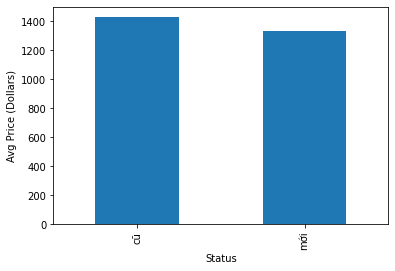

In [40]:

plt1 = cars[['Status','Price']].groupby("Status").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Status")
plt1.set_ylabel("Avg Price (Dollars)")


Text(0, 0.5, 'Avg Price (Dollars)')

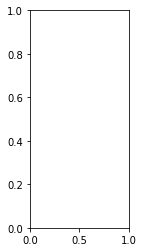

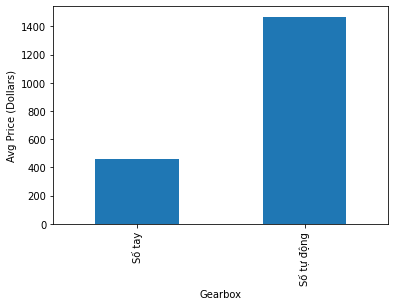

In [22]:

plt.subplot(1,3,1)
plt1 = cars[['Gearbox','Price']].groupby("Gearbox").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Gearbox")
plt1.set_ylabel("Avg Price (Dollars)")
